In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend

In [3]:
# XOR problem
# np.array!
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], "float32")
y = np.array([[0], [1], [1], [0]], "float32")
input_shape = X.shape[1]

In [4]:
model = Sequential()
model.add(Dense(1, activation = 'sigmoid', input_dim = input_shape))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
result = model.fit(X, y, epochs = 500, verbose = 0)

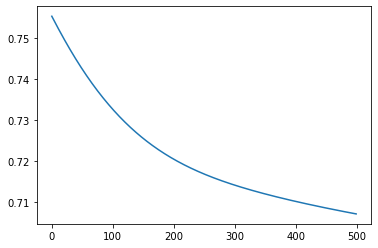

In [5]:
plt.plot(result.history['loss'])

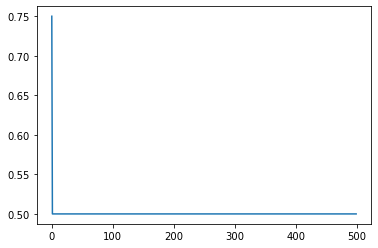

In [6]:
plt.plot(result.history['accuracy'])

In [7]:
backend.clear_session()
model = Sequential()
model.add(Dense(16, activation = 'relu', input_dim = input_shape))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
result = model.fit(X, y, epochs = 10000, verbose = 0)

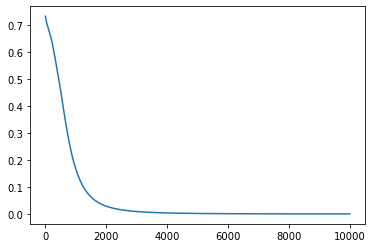

In [8]:
plt.plot(result.history['loss'])

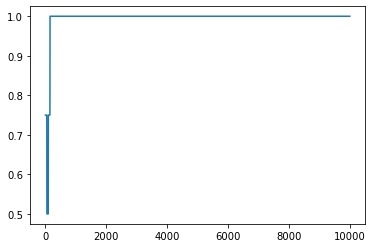

In [9]:
plt.plot(result.history['accuracy'])

In [10]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

In [14]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [15]:
X_train /= 255
X_test /= 255

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
# one - hot encoding
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [18]:
Y_train.shape

(60000, 10)

In [19]:
backend.clear_session()
model = Sequential()
input_shape = X_train.shape[1]
model.add(Dense(100, activation = 'relu', input_dim = input_shape))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
result = model.fit(X_train, Y_train, batch_size = 100, epochs = 20, verbose = 0, validation_data = (X_test, Y_test))

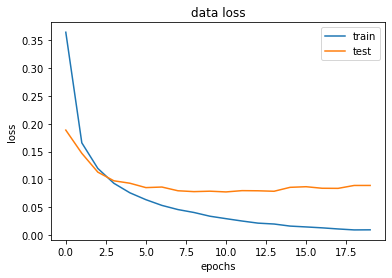

In [20]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('data loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])

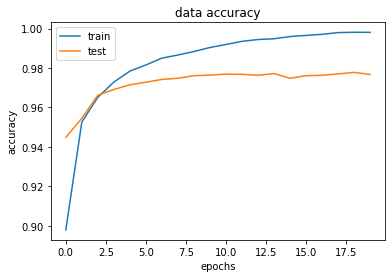

In [21]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('data accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

In [42]:
backend.clear_session()
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 0, test_size = 0.3)

In [45]:
model = Sequential()
input_shape = X_train.shape[1]
model.add(Dense(12, activation = 'relu', input_dim = input_shape))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adagrad', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [46]:
result = model.fit(X_train, y_train, batch_size = 100, epochs = 100, validation_data = (X_test, y_test), verbose = 0)

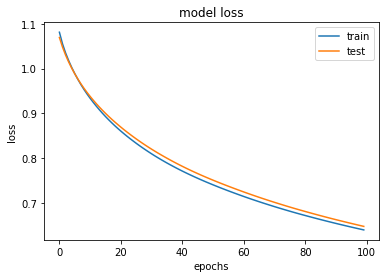

In [53]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])

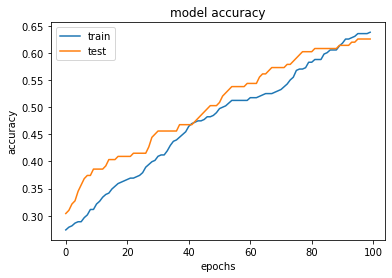

In [54]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])